In [1]:
# First check whether data format is correct

key_list = ['author', 'title', 'year', 'Conference']
for line in open('./dataset/FilteredDBLP.txt', 'r', encoding='utf-8'):
    line = line.strip('\n')
    if len(line) <= 0:
        continue
    if line != '#########':
        word_list = line.split('\t')
        if len(word_list) != 2:
            print('Strange line: %s' % line)
        else:
            if word_list[0] not in key_list:
                print('Strange key: %s in %s' % (word_list[0], line))

In [1]:
from dblp import DBLP, DBLPAuthorList
dataset = DBLP('./dataset/FilteredDBLP.txt')
author_list = DBLPAuthorList(dataset)

In [ ]:
# 找出某个会议的研究者
# 以CVPR为例
author_list.get_by_conference('CVPR')

In [ ]:
# 找出CVPR中已经不活跃的（也就是最后一次发论文的时间在2013年之前（包括2013年））

author_list.get_before_year('CVPR', 2013)

In [ ]:
# 找出CVPR中仍在活跃的（也就是最后一次发论文的时间在2014年之后（包括2014年））

author_list.get_after_year('CVPR', 2014)

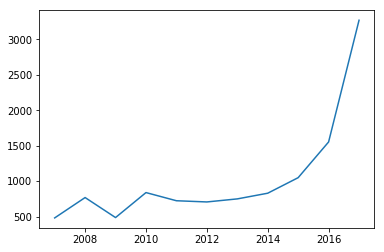

In [5]:
# CVPR按照最后一篇论文发表时间的研究者分布

import matplotlib.pyplot as plt

cvpr = author_list.get_by_conference('CVPR')
author_count = []
year = range(2007, 2018)
for i in year:
    author_count.append(len(cvpr[i]))
plt.plot(year, author_count, label='Count')
plt.show()

In [6]:
# 按照定义，不活跃的研究者和活跃的研究者的占比

inactive = 0
for i in range(2007, 2014):
    inactive += len(cvpr[i])
active = 0
for i in range(2014, 2018):
    active += len(cvpr[i])
print("Active: %s" % active)
print("Inactive: %s" % inactive)

Active: 6698
Inactive: 4758


In [ ]:
# 用FPGrowth算法计算频繁项集

from fp_growth import FPGrowth
fp_growth = FPGrowth()
fp_growth.fit(dataset.get_author_group_list(), min_support=3, min_size=3)
fp_growth.print()

# 根据Group的定义，将频繁项集组合成Group

from dblp import DBLPAuthorPaper, DBLPGroup

author_group = DBLPAuthorPaper(dataset)
group = DBLPGroup(fp_growth.items, author_group)
print(len(group.groups))

In [8]:
# LDA模型训练，主题数为30

from dblp import DBLP
from lda import LdaModel

TOPIC_NUM = 30

dataset = DBLP('./dataset/FilteredDBLP.txt')
topic_model = LdaModel()
topic_model.fit(dataset.get_title_list(), num_topics=TOPIC_NUM)

In [9]:
# 所有的主题

topic_model.model.print_topics(TOPIC_NUM)

[(0,
  '0.092*"plan" + 0.072*"constraint" + 0.059*"game" + 0.056*"agent" + 0.053*"multi" + 0.031*"class" + 0.028*"new" + 0.025*"strategi" + 0.023*"gener" + 0.020*"complex"'),
 (1,
  '0.078*"adapt" + 0.068*"label" + 0.060*"domain" + 0.055*"recommend" + 0.039*"filter" + 0.038*"high" + 0.037*"context" + 0.037*"multi" + 0.031*"awar" + 0.030*"dimension"'),
 (2,
  '0.093*"learn" + 0.065*"supervis" + 0.056*"scene" + 0.054*"view" + 0.048*"discrimin" + 0.043*"languag" + 0.042*"reconstruct" + 0.041*"machin" + 0.039*"semi" + 0.029*"stereo"'),
 (3,
  '0.072*"person" + 0.069*"camera" + 0.068*"toward" + 0.031*"attent" + 0.028*"model" + 0.027*"fusion" + 0.026*"base" + 0.024*"part" + 0.024*"feedback" + 0.024*"qualiti"'),
 (4,
  '0.156*"featur" + 0.078*"select" + 0.050*"embed" + 0.042*"base" + 0.037*"similar" + 0.034*"sequenc" + 0.031*"argument" + 0.029*"boost" + 0.027*"stream" + 0.024*"rate"'),
 (5,
  '0.228*"network" + 0.091*"neural" + 0.049*"social" + 0.046*"convolut" + 0.039*"set" + 0.028*"partial"

In [13]:
# 尝试预测一个标题

result = topic_model.predict('Understanding Behaviors that Lead to Purchasing: A Case Study of Pinterest.')

In [14]:
print(result.prob_list)
result.topic_list

[(2, 0.12916666), (9, 0.12916668), (14, 0.12916666), (18, 0.12916666), (26, 0.37916666)]


['0.093*"learn" + 0.065*"supervis" + 0.056*"scene" + 0.054*"view" + 0.048*"discrimin" + 0.043*"languag" + 0.042*"reconstruct" + 0.041*"machin" + 0.039*"semi" + 0.029*"stereo"',
 '0.051*"extract" + 0.049*"event" + 0.045*"word" + 0.039*"model" + 0.037*"exploit" + 0.036*"discoveri" + 0.027*"correspond" + 0.025*"relev" + 0.024*"appear" + 0.024*"beyond"',
 '0.040*"preserv" + 0.037*"correl" + 0.033*"heurist" + 0.028*"manag" + 0.028*"count" + 0.021*"symmetri" + 0.021*"simpl" + 0.020*"search" + 0.019*"privaci" + 0.018*"cooper"',
 '0.067*"dynam" + 0.058*"human" + 0.052*"interact" + 0.045*"decis" + 0.038*"robot" + 0.034*"system" + 0.028*"behavior" + 0.027*"user" + 0.026*"model" + 0.023*"predict"',
 '0.107*"graph" + 0.083*"rank" + 0.046*"regular" + 0.038*"low" + 0.033*"bound" + 0.032*"project" + 0.030*"tensor" + 0.025*"studi" + 0.023*"bandit" + 0.023*"base"']

In [5]:
from dblp import DBLPAuthorPaper
from fp_growth import FPGrowth

fp_growth = FPGrowth()
fp_growth.fit(dataset.get_author_group_list(), min_support=3, min_size=3)

author_group = DBLPAuthorPaper(dataset)

In [16]:
# 统计团队发表的论文和论文涉及的主题

group = DBLPGroup(fp_growth.items, author_group, topic_model)
with open('result_1.txt', 'w', encoding='utf-8') as f:
    for i in group.get_group_member():
        f.write(str(i) + '\n')
with open('result_2.txt', 'w', encoding='utf-8') as f:
    for i in group.groups:
        f.write(str(i) + '\n')

In [ ]:
# 按照2007-2012以及2013-2017两个时间段，分析两个时间段团队的相似度

fp_growth = FPGrowth()
fp_growth.fit(dataset.get_author_group_list(start_year=2007, end_year=2012), min_support=3, min_size=3)
author_group = DBLPAuthorPaper(dataset, start_year=2007, end_year=2012)
group = DBLPGroup(fp_growth.items, author_group, topic_model)

fp_growth_1 = FPGrowth()
fp_growth_1.fit(dataset.get_author_group_list(start_year=2013, end_year=2017), min_support=3, min_size=3)
author_group_1 = DBLPAuthorPaper(dataset, start_year=2013, end_year=2017)
group_1 = DBLPGroup(fp_growth_1.items, author_group_1, topic_model)

for g in group.groups:
    g_1, similarity = g.find_similar_group(group_1)
    if g_1 is not None:
        print(g)
        print(g_1)
        print('Similarity: ' + str(similarity))